# **Import Libraries**

In [68]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder #to encode categorical data
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report #for evaluation 
from sklearn.preprocessing import StandardScaler #feature scaling 

# **Upload Data**

In [69]:
#Upload the csv file before running this cell
dataset = pd.read_csv("/content/dataset.csv")

,id,Recurrence,Time,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Tumor Size,Lymph node status
7,844582,R,77,13.71,20.83,90.2,577.9,0.11890,0.1645,0.09366,0.05985,0.2196,0.07451,0.5835,1.3770,3.856,50.96,0.008805,0.03029,0.02488,0.01448,0.01486,0.005412,17.06,28.14,110.6,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,4.0,10
172,926954,N,16,16.60,28.08,108.3,858.1,0.08455,0.1023,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.98,34.12,126.7,1124.0,0.1139,0.3094,0.3403,0.1418,0.2218,0.07820,3.5,1
21,852781,N,16,18.61,20.25,122.1,1094.0,0.09440,0.1066,0.14900,0.07731,0.1697,0.05699,0.8529,1.8490,5.632,93.54,0.010750,0.02722,0.05081,0.01911,0.02293,0.004217,21.31,27.26,139.9,1403.0,0.1338,0.2117,0.3446,0.1490,0.2341,0.07421,3.4,13
134,9011494,N,51,20.20,26.83,133.7,1234.0,0.09905,0.1669,0.16410,0.12650,0.1875,0.06020,0.9761,1.8920,7.128,103.60,0.008439,0.04674,0.05904,0.02536,0.03710,0.004286,24.19,33.81,160.0,1671.0,0.1278,0.3416,0.3703,0.2152,0.3271,0.07632,2.5,2
162,915460,N,41,15.46,23.95,103.8,731.3,0.11830,0.1870,0.20300,0.08520,0.1807,0.07083,0.3331,1.9610,2.937,32.52,0.009538,0.04940,0.06019,0.02041,0.02105,0.006000,17.11,36.33,117.7,909.4,0.1732,0.4967,0.5911,0.2163,0.3013,0.10670,2.5,1
68,8711803,N,84,19.89,16.89,130.2,1229.0,0.10050,0.1134,0.14980,0.11210,0.1730,0.06147,1.0510,0.9349,7.382,121.90,0.008231,0.03082,0.04160,0.02785,0.03763,0.003785,22.25,19.08,147.5,1508.0,0.1197,0.1873,0.2487,0.1679,0.2643,0.07048,6.0,2


# **Data Preprocessing**

there are some ? values is data.

First, replace them with NaN

In [70]:
dataset.replace('?', np.nan, inplace = True)
#check how many values are NaN
dataset.isna().sum() 

id                         0
Recurrence                 0
Time                       0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
Tumor Size                 0
Lymph node sta

In [71]:
#shape before removing missing values
print("Cancer data set dimensions : {}".format(dataset.shape))

Cancer data set dimensions : (198, 35)


In [72]:
#since there aren't many missing values, we can remove them from the dataset
dataset = dataset.dropna()

In [73]:
#shape after removing missing values
print("Cancer data set dimensions after removing missing values : {}".format(dataset.shape))

Cancer data set dimensions after removing missing values : (194, 35)


In [74]:
pd.set_option("display.max_columns", 35) #to change the default number of columns to be displayed
dataset.head() 

,id,Recurrence,Time,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Tumor Size,Lymph node status
0,119513,N,31,18.02,27.60,117.50,1013.0,0.09489,0.1036,0.1086,0.07055,0.1865,0.06333,0.6249,1.8900,3.972,71.55,0.004433,0.01421,0.03233,0.009854,0.01694,0.003495,21.63,37.08,139.70,1436.0,0.1195,0.1926,0.3140,0.1170,0.2677,0.08113,5.0,5.1
1,8423,N,61,17.99,10.38,122.80,1001.0,0.11840,0.2776,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.015870,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,3.0,2
2,842517,N,116,21.37,17.44,137.50,1373.0,0.08836,0.1189,0.1255,0.08180,0.2333,0.06010,0.5854,0.6105,3.928,82.15,0.006167,0.03449,0.03300,0.018050,0.03094,0.005039,24.90,20.98,159.10,1949.0,0.1188,0.3449,0.3414,0.2032,0.4334,0.09067,2.5,0
3,843483,N,123,11.42,20.38,77.58,386.1,0.14250,0.2839,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.018670,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,2.0,0
4,843584,R,27,20.29,14.34,135.10,1297.0,0.10030,0.1328,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.018850,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,3.5,0


In [75]:
dataset.drop(columns=['id'], inplace=True) # drop ID column

In [76]:
dataset.head() 

,Recurrence,Time,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Tumor Size,Lymph node status
0,N,31,18.02,27.60,117.50,1013.0,0.09489,0.1036,0.1086,0.07055,0.1865,0.06333,0.6249,1.8900,3.972,71.55,0.004433,0.01421,0.03233,0.009854,0.01694,0.003495,21.63,37.08,139.70,1436.0,0.1195,0.1926,0.3140,0.1170,0.2677,0.08113,5.0,5.1
1,N,61,17.99,10.38,122.80,1001.0,0.11840,0.2776,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.015870,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,3.0,2
2,N,116,21.37,17.44,137.50,1373.0,0.08836,0.1189,0.1255,0.08180,0.2333,0.06010,0.5854,0.6105,3.928,82.15,0.006167,0.03449,0.03300,0.018050,0.03094,0.005039,24.90,20.98,159.10,1949.0,0.1188,0.3449,0.3414,0.2032,0.4334,0.09067,2.5,0
3,N,123,11.42,20.38,77.58,386.1,0.14250,0.2839,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.018670,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,2.0,0
4,R,27,20.29,14.34,135.10,1297.0,0.10030,0.1328,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.018850,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,3.5,0


In [77]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 194 entries, 0 to 197
Data columns (total 34 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Recurrence               194 non-null    object 
 1   Time                     194 non-null    int64  
 2   radius_mean              194 non-null    float64
 3   texture_mean             194 non-null    float64
 4   perimeter_mean           194 non-null    float64
 5   area_mean                194 non-null    float64
 6   smoothness_mean          194 non-null    float64
 7   compactness_mean         194 non-null    float64
 8   concavity_mean           194 non-null    float64
 9   concave points_mean      194 non-null    float64
 10  symmetry_mean            194 non-null    float64
 11  fractal_dimension_mean   194 non-null    float64
 12  radius_se                194 non-null    float64
 13  texture_se               194 non-null    float64
 14  perimeter_se             1

In [78]:
dataset = dataset.astype({"Recurrence":'category', "Lymph node status":'float', "Time":'float'}) #change data types

In [79]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 194 entries, 0 to 197
Data columns (total 34 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Recurrence               194 non-null    category
 1   Time                     194 non-null    float64 
 2   radius_mean              194 non-null    float64 
 3   texture_mean             194 non-null    float64 
 4   perimeter_mean           194 non-null    float64 
 5   area_mean                194 non-null    float64 
 6   smoothness_mean          194 non-null    float64 
 7   compactness_mean         194 non-null    float64 
 8   concavity_mean           194 non-null    float64 
 9   concave points_mean      194 non-null    float64 
 10  symmetry_mean            194 non-null    float64 
 11  fractal_dimension_mean   194 non-null    float64 
 12  radius_se                194 non-null    float64 
 13  texture_se               194 non-null    float64 
 14  perimeter_

In [80]:
dataset

,Recurrence,Time,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Tumor Size,Lymph node status
0,N,31.0,18.02,27.60,117.50,1013.0,0.09489,0.10360,0.10860,0.07055,0.1865,0.06333,0.6249,1.8900,3.972,71.55,0.004433,0.01421,0.03233,0.009854,0.01694,0.003495,21.63,37.08,139.70,1436.0,0.11950,0.1926,0.3140,0.11700,0.2677,0.08113,5.0,5.1
1,N,61.0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.015870,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.16220,0.6656,0.7119,0.26540,0.4601,0.11890,3.0,2.0
2,N,116.0,21.37,17.44,137.50,1373.0,0.08836,0.11890,0.12550,0.08180,0.2333,0.06010,0.5854,0.6105,3.928,82.15,0.006167,0.03449,0.03300,0.018050,0.03094,0.005039,24.90,20.98,159.10,1949.0,0.11880,0.3449,0.3414,0.20320,0.4334,0.09067,2.5,0.0
3,N,123.0,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.018670,0.05963,0.009208,14.91,26.50,98.87,567.7,0.20980,0.8663,0.6869,0.25750,0.6638,0.17300,2.0,0.0
4,R,27.0,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.018850,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.13740,0.2050,0.4000,0.16250,0.2364,0.07678,3.5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192,N,3.0,14.72,25.26,99.28,657.5,0.11740,0.21120,0.17290,0.09465,0.2079,0.07496,0.3405,1.1580,2.188,26.12,0.004957,0.04553,0.05166,0.015970,0.02539,0.005548,16.67,31.97,111.60,814.8,0.14640,0.5352,0.5655,0.19740,0.3778,0.11320,1.7,21.0
193,N,10.0,22.52,21.92,146.90,1597.0,0.07592,0.09162,0.06862,0.06367,0.1728,0.05262,1.3740,2.3120,9.938,192.40,0.004422,0.02679,0.02433,0.020360,0.02486,0.003922,24.67,24.81,162.10,1902.0,0.08191,0.1319,0.1056,0.09378,0.2061,0.05788,6.0,2.0
194,N,8.0,15.44,31.18,101.00,740.4,0.09399,0.10620,0.13750,0.06500,0.1735,0.06105,0.3235,1.8390,1.971,32.61,0.006178,0.02088,0.02834,0.010790,0.02122,0.003168,17.34,41.48,112.60,929.0,0.12720,0.2362,0.2975,0.12860,0.2914,0.08024,1.5,0.0
195,N,12.0,17.17,29.19,110.00,915.3,0.08952,0.06655,0.06583,0.05068,0.1793,0.05392,0.6101,1.4250,3.827,63.02,0.006890,0.01556,0.03155,0.009714,0.02734,0.001377,20.76,36.66,132.50,1295.0,0.12610,0.1572,0.2141,0.09520,0.3362,0.06033,3.7,0.0


In [81]:
# creating instance of labelencoder
labelencoder = LabelEncoder()
dataset['Recurrence'] = labelencoder.fit_transform(dataset['Recurrence'])
dataset

,Recurrence,Time,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Tumor Size,Lymph node status
0,0,31.0,18.02,27.60,117.50,1013.0,0.09489,0.10360,0.10860,0.07055,0.1865,0.06333,0.6249,1.8900,3.972,71.55,0.004433,0.01421,0.03233,0.009854,0.01694,0.003495,21.63,37.08,139.70,1436.0,0.11950,0.1926,0.3140,0.11700,0.2677,0.08113,5.0,5.1
1,0,61.0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.015870,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.16220,0.6656,0.7119,0.26540,0.4601,0.11890,3.0,2.0
2,0,116.0,21.37,17.44,137.50,1373.0,0.08836,0.11890,0.12550,0.08180,0.2333,0.06010,0.5854,0.6105,3.928,82.15,0.006167,0.03449,0.03300,0.018050,0.03094,0.005039,24.90,20.98,159.10,1949.0,0.11880,0.3449,0.3414,0.20320,0.4334,0.09067,2.5,0.0
3,0,123.0,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.018670,0.05963,0.009208,14.91,26.50,98.87,567.7,0.20980,0.8663,0.6869,0.25750,0.6638,0.17300,2.0,0.0
4,1,27.0,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.018850,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.13740,0.2050,0.4000,0.16250,0.2364,0.07678,3.5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192,0,3.0,14.72,25.26,99.28,657.5,0.11740,0.21120,0.17290,0.09465,0.2079,0.07496,0.3405,1.1580,2.188,26.12,0.004957,0.04553,0.05166,0.015970,0.02539,0.005548,16.67,31.97,111.60,814.8,0.14640,0.5352,0.5655,0.19740,0.3778,0.11320,1.7,21.0
193,0,10.0,22.52,21.92,146.90,1597.0,0.07592,0.09162,0.06862,0.06367,0.1728,0.05262,1.3740,2.3120,9.938,192.40,0.004422,0.02679,0.02433,0.020360,0.02486,0.003922,24.67,24.81,162.10,1902.0,0.08191,0.1319,0.1056,0.09378,0.2061,0.05788,6.0,2.0
194,0,8.0,15.44,31.18,101.00,740.4,0.09399,0.10620,0.13750,0.06500,0.1735,0.06105,0.3235,1.8390,1.971,32.61,0.006178,0.02088,0.02834,0.010790,0.02122,0.003168,17.34,41.48,112.60,929.0,0.12720,0.2362,0.2975,0.12860,0.2914,0.08024,1.5,0.0
195,0,12.0,17.17,29.19,110.00,915.3,0.08952,0.06655,0.06583,0.05068,0.1793,0.05392,0.6101,1.4250,3.827,63.02,0.006890,0.01556,0.03155,0.009714,0.02734,0.001377,20.76,36.66,132.50,1295.0,0.12610,0.1572,0.2141,0.09520,0.3362,0.06033,3.7,0.0


# **Data Splitting (x,y)**

In [82]:
X = dataset.iloc[:,dataset.columns != 'Recurrence'] #take the features which is from column index 1 to the last column
Y = dataset['Recurrence']

In [83]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [84]:
pd.DataFrame(X)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32
0,-0.462853,0.195253,1.225461,0.127179,0.124650,-0.627033,-0.779281,-0.674251,-0.479935,-0.231263,0.080786,0.067581,1.170960,-0.131567,0.026231,-0.792623,-0.967221,-0.410891,-0.961628,-0.381849,-0.261918,0.150900,1.140054,-0.015195,0.058483,-1.108262,-1.041587,-0.699976,-1.353154,-0.738394,-0.452563,1.096075,0.345478
1,0.408365,0.185770,-2.756867,0.375128,0.090583,1.242682,2.693812,2.032129,1.779861,1.775458,2.196309,1.588573,-0.699991,1.986189,1.735146,-0.133268,1.000833,0.611933,0.130438,0.980454,1.125208,1.036436,-2.123266,1.546411,1.054169,0.829555,1.823322,1.582786,1.914715,1.865927,1.319332,0.068091,-0.221736
2,2.005598,1.254211,-1.124159,1.062835,1.146655,-1.146354,-0.473888,-0.435411,-0.147829,1.463945,-0.363501,-0.060220,-1.260118,-0.151750,0.247544,-0.211076,0.178691,-0.378868,0.526167,1.075159,0.531901,0.923088,-1.520172,0.659530,0.934619,-1.140030,-0.119123,-0.542781,0.545029,1.504517,-0.005015,-0.188905,-0.587681
3,2.208882,-1.891052,-0.444249,-1.740389,-1.655059,3.159319,2.819562,1.202549,0.542951,2.420217,4.772626,-0.350764,-0.223656,-0.373295,-0.899110,0.775944,2.443960,0.749584,0.638714,4.060985,2.675314,-1.435981,-0.608094,-1.435248,-1.424458,2.989745,3.038939,1.439360,1.740751,4.623205,3.857313,-0.445902,-0.587681
4,-0.579016,0.912816,-1.841070,0.950556,0.930899,-0.196784,-0.196440,0.589198,0.516382,-0.434109,-0.538190,0.495633,-0.935594,0.540867,0.504142,1.574146,-0.379574,0.762488,0.671389,-0.317324,0.570975,0.365790,-2.232319,0.419550,0.295876,-0.295922,-0.966482,-0.206592,-0.351213,-1.162070,-0.656634,0.325087,-0.587681
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,-1.275990,-0.847900,0.684308,-0.725203,-0.884581,1.163154,1.368448,0.234471,0.231509,0.543896,1.680496,-0.852585,-0.219856,-0.949864,-0.922285,-0.616885,0.802502,0.512996,0.148591,0.497560,0.793593,-1.020369,0.295722,-0.992503,-1.002444,0.112517,1.033503,0.742886,0.417309,0.751916,1.051929,-0.600099,3.254737
190,-1.072706,1.617734,-0.088106,1.502593,1.782570,-2.135689,-1.018406,-1.239269,-0.683037,-0.727510,-1.392378,2.491268,1.972769,2.604957,2.549413,-0.796312,-0.256394,-0.793255,0.945494,0.442402,-0.042384,0.868775,-0.887335,0.763869,0.854349,-2.814177,-1.409240,-1.895571,-1.864474,-1.572210,-1.543285,1.610068,-0.221736
191,-1.130787,-0.620303,2.053378,-0.644737,-0.649235,-0.698609,-0.727384,-0.265820,-0.643774,-0.702154,-0.232829,-0.907588,1.074059,-1.049399,-0.786783,-0.207387,-0.590336,-0.601595,-0.791719,0.063579,-0.430039,-0.862153,1.867072,-0.957724,-0.807405,-0.758820,-0.777507,-0.794637,-1.097714,-0.417592,-0.494316,-0.702898,-0.587681
192,-1.014625,-0.073438,1.593167,-0.223692,-0.152711,-1.054101,-1.518810,-1.278699,-1.066508,-0.492065,-1.213562,0.019696,0.287450,-0.198077,-0.151864,0.031403,-0.890940,-0.448171,-0.987042,0.700500,-1.350848,-0.054544,1.070657,-0.265609,-0.182326,-0.808740,-1.256001,-1.273104,-1.833204,0.188820,-1.428349,0.427885,-0.587681


In [85]:
Y

0      0
1      0
2      0
3      0
4      1
      ..
192    0
193    0
194    0
195    0
197    0
Name: Recurrence, Length: 194, dtype: int64

In [86]:
#to get the number of data point in each class
dataset['Recurrence'].value_counts()

0    148
1     46
Name: Recurrence, dtype: int64

In [87]:
from imblearn.over_sampling import RandomOverSampler
oversample = RandomOverSampler(sampling_strategy='minority')
X, Y = oversample.fit_resample(X, Y)

In [88]:
Y

0      0
1      0
2      0
3      0
4      1
      ..
291    1
292    1
293    1
294    1
295    1
Name: Recurrence, Length: 296, dtype: int64

# **Data Splitting (training, testing)**

In [89]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.15, random_state=0)

In [90]:
Y_train.value_counts()

0    127
1    124
Name: Recurrence, dtype: int64

In [91]:
Y_test.value_counts()

1    24
0    21
Name: Recurrence, dtype: int64

# **Build Model**

## Naive Bayes


Here, we used gaussian naive bayes because we have variables with continous values

In [92]:
from sklearn.naive_bayes import GaussianNB
# instantiate the model
gnb_classifier = GaussianNB()
# fit the model
gnb_classifier.fit(X_train, Y_train)
#predict result 
gnb_y_pred = gnb_classifier.predict(X_test)
print('Training set: {:.2f}%'.format(gnb_classifier.score(X_train, Y_train)*100))
print('Testing set: {:.2f}%'.format(gnb_classifier.score(X_test, Y_test)*100))

Training set: 63.75%
Testing set: 62.22%


## SVM

In [93]:
from sklearn.svm import SVC  
svc_classifier = SVC(kernel='linear') 
svc_classifier.fit(X_train, Y_train)
svc_y_predict = svc_classifier.predict(X_test)
print('Training set: {:.2f}%'.format(svc_classifier.score(X_train, Y_train)*100))
print('Testing set: {:.2f}%'.format(svc_classifier.score(X_test, Y_test)*100))

Training set: 86.06%
Testing set: 73.33%


## Decision Tree

In [94]:
from sklearn.tree import DecisionTreeClassifier as DT
DT_classifier = DT()
DT_classifier.fit(X_train, Y_train)
DT_y_predict= DT_classifier.predict(X_test) 
print('Training set: {:.2f}%'.format(DT_classifier.score(X_train, Y_train)*100))
print('Testing set: {:.2f}%'.format(DT_classifier.score(X_test, Y_test)*100))

Training set: 100.00%
Testing set: 84.44%


## Random Forest

In [95]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier()
forest.fit(X_train, Y_train) 
rf_y_predict= forest.predict(X_test) 
print('Training set: {:.2f}%'.format(forest.score(X_train, Y_train)*100))
print('Testing set: {:.2f}%'.format(forest.score(X_test, Y_test)*100))

Training set: 100.00%
Testing set: 97.78%


# **Evaluation**

##Confusion Matrix

              precision    recall  f1-score   support

           0       0.57      0.76      0.65        21
           1       0.71      0.50      0.59        24

    accuracy                           0.62        45
   macro avg       0.64      0.63      0.62        45
weighted avg       0.64      0.62      0.62        45



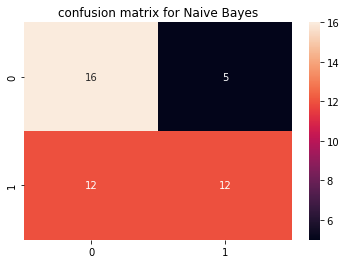

In [96]:
# create confusion matrix
gnb_cm=confusion_matrix(Y_test,gnb_y_pred)
# display the matrix
sns.heatmap(gnb_cm,annot=True)
# set title
plt.title("confusion matrix for Naive Bayes")
# print classification report
print(classification_report(Y_test, gnb_y_pred))

              precision    recall  f1-score   support

           0       0.70      0.76      0.73        21
           1       0.77      0.71      0.74        24

    accuracy                           0.73        45
   macro avg       0.73      0.74      0.73        45
weighted avg       0.74      0.73      0.73        45



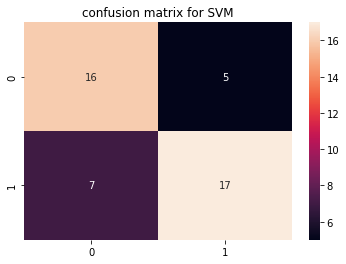

In [97]:
svc_cm=confusion_matrix(Y_test,svc_y_predict)
sns.heatmap(svc_cm,annot=True)
plt.title("confusion matrix for SVM")
print(classification_report(Y_test, svc_y_predict))

              precision    recall  f1-score   support

           0       1.00      0.67      0.80        21
           1       0.77      1.00      0.87        24

    accuracy                           0.84        45
   macro avg       0.89      0.83      0.84        45
weighted avg       0.88      0.84      0.84        45



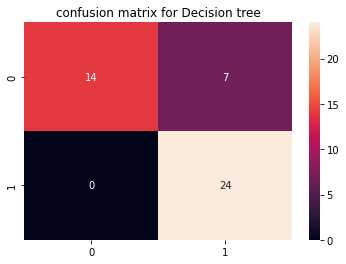

In [98]:
DT_cm=confusion_matrix(Y_test,DT_y_predict)
sns.heatmap(DT_cm,annot=True)
plt.title("confusion matrix for Decision tree")
print(classification_report(Y_test,DT_y_predict)) 

              precision    recall  f1-score   support

           0       0.95      1.00      0.98        21
           1       1.00      0.96      0.98        24

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



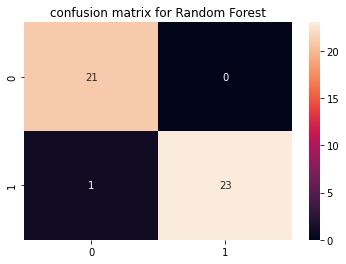

In [99]:
rf = confusion_matrix(Y_test, rf_y_predict)
sns.heatmap(rf, annot=True)
plt.title("confusion matrix for Random Forest")
print(classification_report(Y_test,rf_y_predict)) 